In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
# Importing the dataset
dataset = pd.read_csv('../data/Social_Network_Ads.csv')


In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X = dataset.loc[:, ['Age', 'EstimatedSalary']].values
y = dataset.loc[:, 'Purchased'].values


In [6]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state = 0)

In [7]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(float))
X_test = sc.transform(X_test.astype(float))


In [34]:
# Fitting SVM to the Training set
classifier = SVC(C=1.0,
                 kernel='rbf',
                 degree=3,
                 gamma='scale',
                 coef0=0.0,
                 shrinking=True,
                 probability=False,
                 tol=0.001,
                 cache_size=200,
                 class_weight=None,
                 verbose=False,
                 max_iter=-1,
                 decision_function_shape='ovr',
                 random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

Confusion Matrix:
[[64  4]
 [ 3 29]]


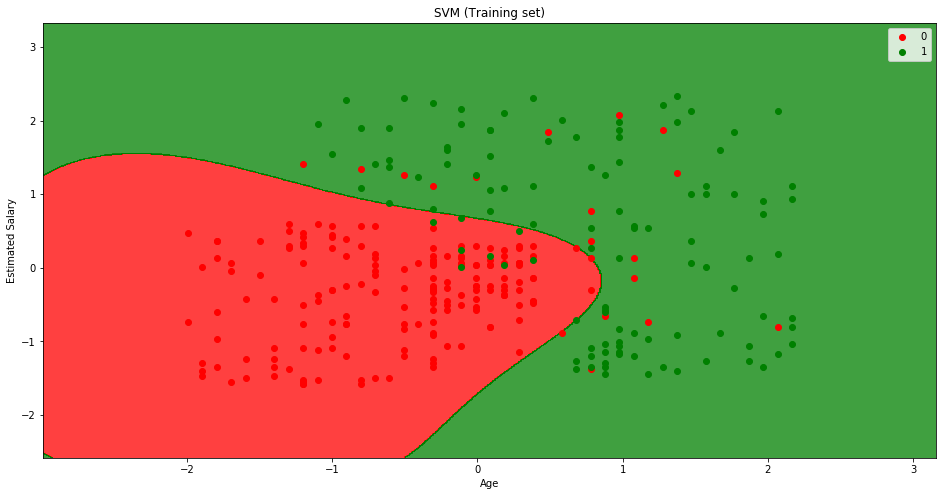

In [37]:
# Visualising the Training set results
fig = plt.figure(figsize=(16, 8))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1,
                               step=0.01))
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(),
                                          X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,
             cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],
                X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i),
                label=j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

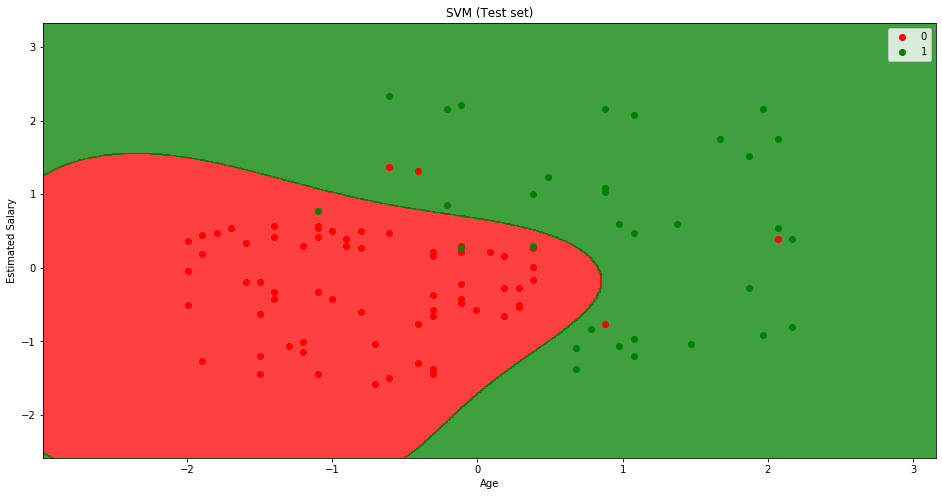

In [38]:
# Visualising the Test set results
fig = plt.figure(figsize=(16, 8))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1,
                               step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1,
                               step=0.01))
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(),
                                          X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,
             cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],
                X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i),
                label=j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()